In [48]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [21]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


# Exploratory Data Analysis

### Target

C:\Users\Nostics\miniconda3\envs\jcopml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

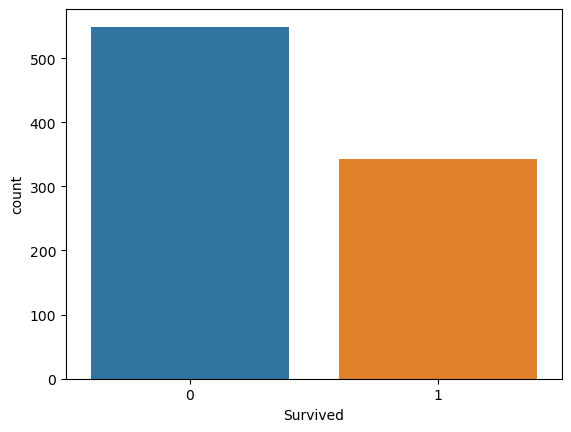

In [12]:
sns.countplot(df["Survived"])

# Lebih banyak yang tidak selamat

### Numerical (Features) vs Target

#### Age Column

C:\Users\Nostics\miniconda3\envs\jcopml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nostics\miniconda3\envs\jcopml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


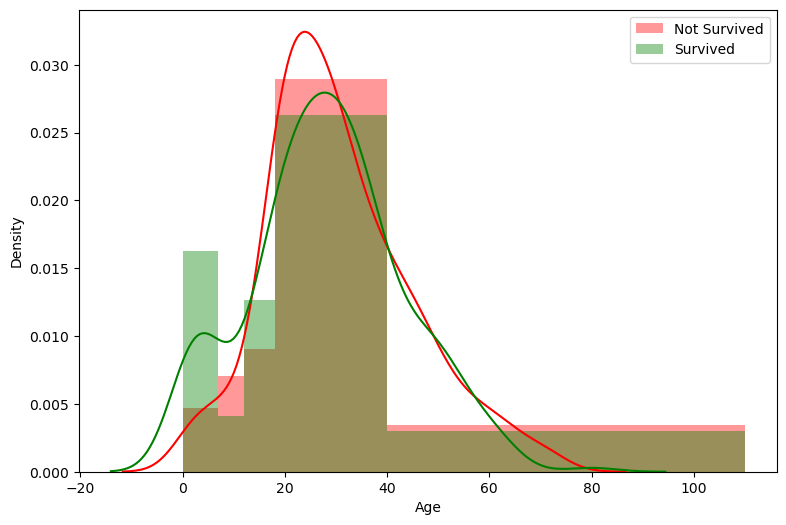

In [18]:
plt.figure(figsize=(9, 6))
sns.distplot( df.Age[df["Survived"] == 0], bins=[0, 7, 12, 18, 40, 110], label="Not Survived", color="r" )
sns.distplot( df.Age[df["Survived"] == 1], bins=[0, 7, 12, 18, 40, 110], label="Survived", color="g" )
plt.legend();

#### Fare Column

C:\Users\Nostics\miniconda3\envs\jcopml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nostics\miniconda3\envs\jcopml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


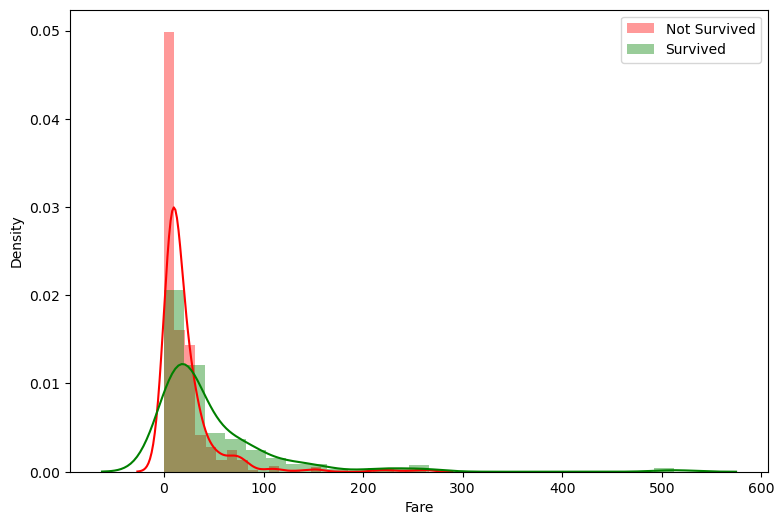

In [32]:
plt.figure(figsize=(9, 6))
sns.distplot( df.Fare[df["Survived"] == 0], bins=25, color="r", label="Not Survived" )
sns.distplot( df.Fare[df["Survived"] == 1], bins=25, color="g", label="Survived" )
plt.legend()

### Categorical / Ordinal (Feature) vs Target

#### Subplots

C:\Users\Nostics\miniconda3\envs\jcopml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nostics\miniconda3\envs\jcopml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nostics\miniconda3\envs\jcopml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

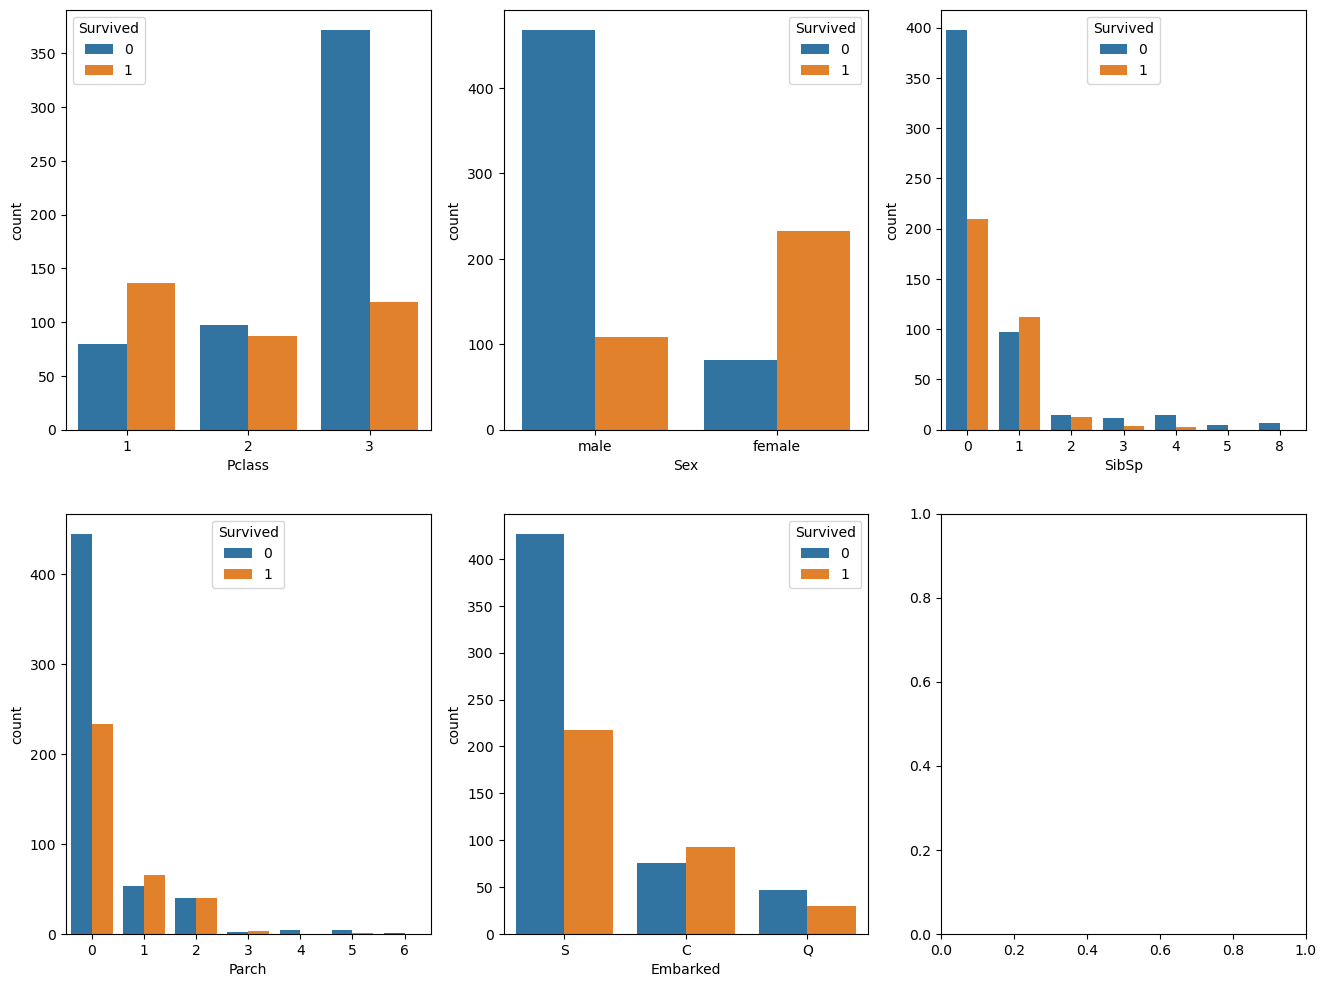

In [30]:
columns_data = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

fig, ax = plt.subplots(2, 3, figsize=(16, 12))

for categoric, ax in zip(columns_data, ax.flatten()):
    sns.countplot(categoric, data=df, hue="Survived", ax=ax)


# Pandas Crosstab

In [40]:
test = pd.crosstab(df.Pclass, df.Survived, normalize="index")
test

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

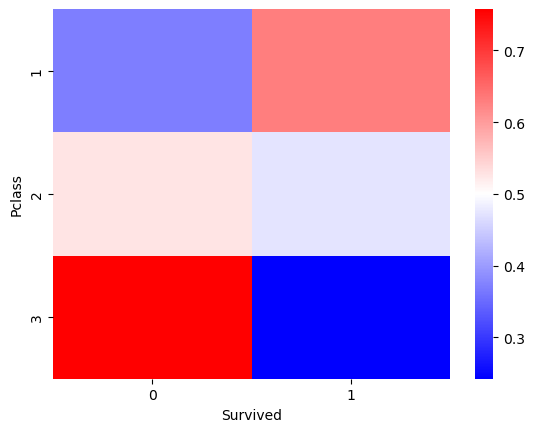

In [41]:
sns.heatmap(test, cmap="bwr")

# Feature Engineering

### isAlone ?

In [43]:
df["is_alone"] = (df.SibSp == 0) & (df.Parch == 0)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,False
2,1,1,female,38.0,1,0,71.2833,C,False
3,1,3,female,26.0,0,0,7.9250,S,True
4,1,1,female,35.0,1,0,53.1000,S,False
5,0,3,male,35.0,0,0,8.0500,S,True


### Binning (numeric to categoric)

In [46]:
# for age column
df["Age"] = pd.cut(
                    df["Age"],
                    bins=[0, 8, 18, 40, 100],
                    labels=["balita", "remaja", "dewasa", "lansia"]
)

# for fare column
df["Fare"] = pd.cut(
                    df["Fare"],
                    bins=[0, 25, 100, 550],
                    labels=["murah", "sedang", "mahal"]
)

In [47]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,murah,S,False
2,1,1,female,dewasa,1,0,sedang,C,False
3,1,3,female,dewasa,0,0,murah,S,True
4,1,1,female,dewasa,1,0,sedang,S,False
5,0,3,male,dewasa,0,0,murah,S,True


## Splitting Dataset

In [59]:
X = df.drop(columns="Survived")
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 8), (268, 8), (623,), (268,))

## Preprocessor

In [60]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'is_alone'],
      dtype='object')

In [61]:
num_data = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

cat_data = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder())
])


preprocessor = ColumnTransformer([
    ("numeric", num_data, ["SibSp", "Parch"]),
    ("categoric", cat_data, ["Sex", "Age", "Fare", "Embarked", "is_alone", "Pclass"])
])


## Training

In [62]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])

model = GridSearchCV(
                    pipeline,
                    param_grid={
                        "algo__n_neighbors": range(1, 30, 2),
                        "algo__weights": ["uniform", "distance"],
                        "algo__p": [1, 1.5, 2]
                    },
                    n_jobs=-1,
                    verbose=1
)

model.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['SibSp',
                                                                          'Parch']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                              

## Evaluation

In [63]:
print(model.best_params_)
print(model.score(X_train, y_train), model.score(X_test, y_test))

{'algo__n_neighbors': 7, 'algo__p': 1.5, 'algo__weights': 'distance'}
0.8780096308186196 0.7985074626865671
